<h1 style="text-align:center"> An Post office distribution in Ireland </h1>

## **Aim of this notebook**

Access to local post offices is important for many reasons including financial services, government services, community interaction and economic development for an area.

The aim of this report is to study postal office distribution across Ireland. The study looks at post office distribution per county and looks at distribution per area (km2), population and population density of each county.

This data is then used to generate a composite index score for post office distribution which accounts for size, population and population density in order to evaluate which counties have the highest number of offices after normalization.

## **Method**

Lists of individual post offices were scraped from google maps by searching within each county (see 'data_preparation.ipynb' for more information). This resulted in a list of approximately 900 post offices.

In order to filter for duplicate entries the phone number of each post office was used as a unique identifier. Only post offices with listed numbers were used, and only single records for each number were kept for analysis. This resulted in a list of 772 post offices (see the datafile 'cleaned_ROI_post_offices.csv' in the 'Data' directory for this file).

Data for post offices was grouped per county, resulting in the number of post offices per county. This data was then merged with census 2022 data for population and county size in area (km2). Population density was calculated by dividing population size by the area of each county.

This data was then used to calculate amount of post offices per capita and per area(km2).

In order to gain a composite index for post offices in each county a composite index was generated using population size, county size and population density as normalizing factors with each factor having an equal weight.

## **Data sources**

Post office number in Ireland: 

https://www.google.com/maps

Census population data (2022) and county size data:

https://www.cso.ie/en/index.html 

mapped co-ordinates for Irish counties for map plotting

https://github.com/SaM-92/Choropleth-map-Ireland

## **Results**

- **Total post offices recorded in each county**

The capital city, Dublin, has the highest amount of post offices with 115 offices (see Figure 1 map). This is also the city with the highest population (1,458,154). It can be seen that population size is highly correlated with number of post offices (Figure 1 scatter plot).

Laois has the lowest amount of post offices, with 8 being recorded. Although it is the 17th most populated county, it has a much smaller population than Dublin (~91,000, ~6.3% of the Dublin population).

- **Post offices in each county per km<sup>2</sup>**

It can be seen that the size of a county is also highly correlated with the number of post offices, with Dublin being an outlier here due to its large amount of post offices and small area size (see Figure 2). 

Dublin has the highest amount of post offices per area, while Longford has the lowest value for post offices per km<sup>2</sup>.

- **Post offices per capita**

Dublin has the lowest amount of post offices per capita, while Leitrim has the highest.

- **Composite index for post office distribution**

A composite indicator was created to try take population, density and county size in to equal account. 

Dublin had the highest indicator value, while Longford had the lowest composite indicator for post office numbers.

## **Conclusions**

The results suggest that post office distribution in Ireland is closely tied to factors such as population, county size, and population density. Dublin, being the capital and most populous city, naturally possesses the highest number of post offices but records a lower number per capita, reflecting the dynamics of high density urban areas.

Counties such as Longford face challenges in terms of post office accessibility due to lower population density and limited geographical area.

## **Recommendations**

- Consideration should be taken towards addressing disparities in post office accessibility, especially in counties with lower population densities.

- Population trends and projections to anticipate changes in demand for postal services should be monitored.


**Some limitations of this study**

- Google maps was used to generate the list of post offices, this may not be a complete set of offices and the location does not capture the different services/size of the post office.

- Population density calculations are based on total population and county area, which might not account for variations within counties.

- The notebook assigns equal weights to factors in the composite indicator. This assumes that each factor (population, density, size, and post offices) contributes equally to post office distribution, which may not reflect the true importance of these factors. There are also likely many more factors affecting office distribution which are not captured here.

In [22]:
import pandas as pd # panel data
import numpy as np # numerical python, for transformations
import matplotlib.pyplot as plt # matplotlib for plotting
import matplotlib.gridspec as gridspec # change the width of grids relative to each other
import seaborn as sns # seaborn for plotting
import geopandas as gpd # import geopandas

In [23]:
# load in the df prepared in "data_prep" notebook - number of post offices per county/capita and area km2

df = pd.read_csv("../data/post_office_ROI_pop_area.csv")
df.head()

,county,area_km2,post_offices,population,post_offices_per_capita,post_office_per_area_km2,population_per_km2
0,Cork,7457,85,584156,0.000146,0.011399,78.336596
1,Galway,6148,56,277737,0.000202,0.009109,45.175179
2,Mayo,5585,46,137970,0.000333,0.008236,24.703671
3,Donegal,4841,52,167084,0.000311,0.010742,34.514357
4,Kerry,4746,31,156458,0.000198,0.006532,32.966287


In [3]:
# Load a GeoDataFrame of Irish counties
ireland_map = gpd.read_file('../data/IRL_adm/IRL_adm1.shp')

ireland_map.loc[10, 'NAME_1'] = "Laois" # rename to Laois

# Merge data with the GeoDataFrame based on county names, 'NAME_1' column

ireland_map=ireland_map.set_index('NAME_1')
df=df.set_index('county')
df2= ireland_map.join(df)

df2.reset_index(inplace=True)

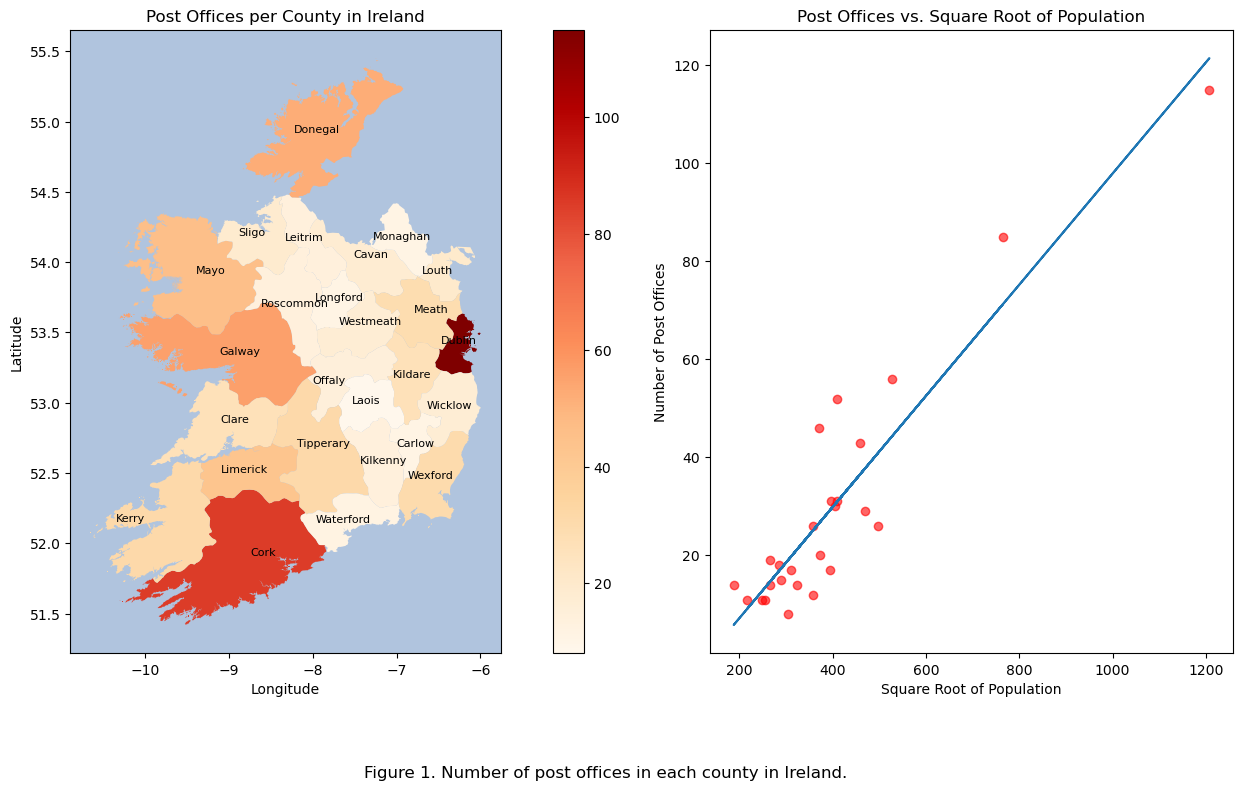

In [4]:
# Figure 1: Plotting number of post offices in each county.

# Square root of population for plotting
df2['sqrt_population'] = np.sqrt(df2['population'])

# Create a figure with subplots, specifying relative widths and no gap between
fig = plt.figure(figsize=(16, 8))
spec = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0)

# Left subplot: Choropleth map (Post offices by county)
ax1 = plt.subplot(spec[0])
ax1 = df2.plot(column='post_offices', cmap='OrRd', legend=True, ax=ax1)
ax1.set_facecolor('lightsteelblue')

# Get lat and lon here from geometry data
df2['coords'] = df2['geometry'].apply(lambda x: x.representative_point().coords[:])
df2['coords'] = [coords[0] for coords in df2['coords']]

# Add names of counties
for idx, row in df2.iterrows():
    ax1.annotate(text=row['NAME_1'], xy=row['coords'],
                 horizontalalignment='center', color='black', fontsize=8, fontweight='light')

# Add title and labels for the choropleth map
ax1.set_title('Post Offices per County in Ireland')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Right subplot: Scatter plot (Post offices vs. Square Root of Population)
ax2 = plt.subplot(spec[1])
ax2.scatter(df2['sqrt_population'], df2['post_offices'], c='red', alpha=0.6)
ax2.set_title('Post Offices vs. Square Root of Population')
ax2.set_xlabel('Square Root of Population')
ax2.set_ylabel('Number of Post Offices')

# add regression line
x = df2['sqrt_population']
y = df2['post_offices']
m, b = np.polyfit(x, y, 1) #polyfit computes line of least squares 

plt.plot(x, m*x+b) # plot the regression line

# Add annotation under the plots
plt.annotate('Figure 1. Number of post offices in each county in Ireland.',
             xy=(-0.2, -0.2),  # Coordinates for the text
             xycoords='axes fraction',  # Use axes fraction coordinates
             fontsize=12, color='black',
             horizontalalignment='center')

# Show the plots
plt.tight_layout()
plt.show()

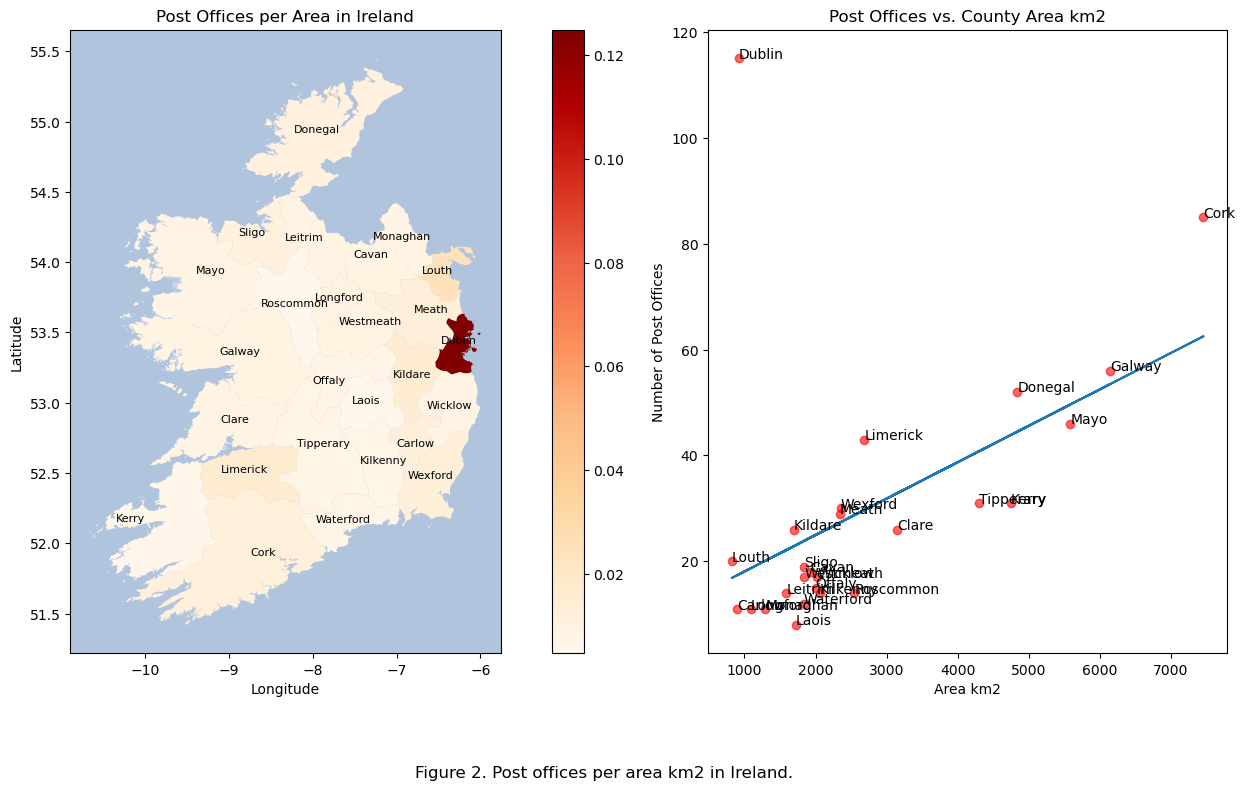

In [5]:
# Figure 2: Plotting post offices per Area (km2) of counties. 

# Create figure with subplots
fig = plt.figure(figsize=(16, 8))
spec = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0)  # wspace set to 0

# Left plot: Choropleth map 
ax1 = plt.subplot(spec[0])
ax1 = df2.plot(column='post_office_per_area_km2', cmap='OrRd', legend=True, ax=ax1)
ax1.set_facecolor('lightsteelblue') # seacolour blue colour

# Getting the lat and lon here from geometry data
df2['coords'] = df2['geometry'].apply(lambda x: x.representative_point().coords[:])
df2['coords'] = [coords[0] for coords in df2['coords']]

# Add names of counties
for idx, row in df2.iterrows():
    ax1.annotate(text=row['NAME_1'], xy=row['coords'],
                 horizontalalignment='center', color='black', fontsize=8, fontweight='light')

# Add title and labels for left plot
ax1.set_title('Post Offices per Area in Ireland')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Right subplot: Scatter plot (Post offices vs. Square Root of Population)
ax2 = plt.subplot(spec[1])
ax2.scatter(df2['area_km2'], df2['post_offices'], c='red', alpha=0.6)
ax2.set_title('Post Offices vs. County Area km2')
ax2.set_xlabel('Area km2')
ax2.set_ylabel('Number of Post Offices')

# add regression line
x = df2['area_km2']
y = df2['post_offices']
m, b = np.polyfit(x, y, 1) #polyfit computes line of least squares 

plt.plot(x, m*x+b) # plot the line

# Add annotation under the plot
plt.annotate('Figure 2. Post offices per area km2 in Ireland.',
             xy=(-0.2, -0.2),  # Coordinates for the text
             xycoords='axes fraction',  # Use axes fraction coordinates
             fontsize=12, color='black',
             horizontalalignment='center')

# Add labels for each data point
for i, row in df2.iterrows():
    plt.text(row['area_km2'], row['post_offices'], row['NAME_1'], fontsize=10)

# Show the plots
plt.tight_layout()
plt.show()

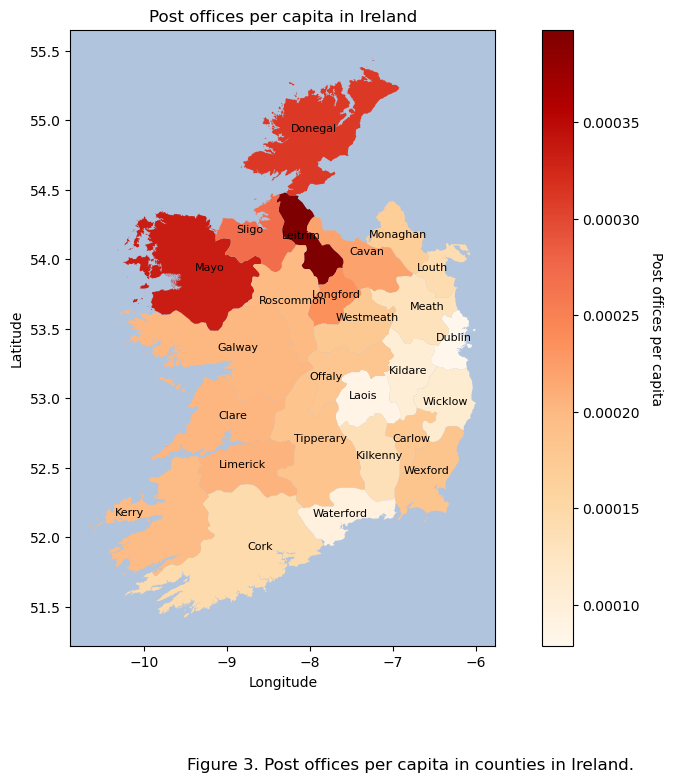

In [6]:
# Figure 3: Plotting post offices per capita of each county.

# Create a choropleth map for post offices per capita
ax = df2.plot(column='post_offices_per_capita', cmap='OrRd', legend=True, figsize=(12, 8))

# Set the background color to seacolour blue
ax.set_facecolor('lightsteelblue')

# Add names of counties
for idx, row in df2.iterrows():
    plt.annotate(text=row['NAME_1'], xy=row['coords'],
                 horizontalalignment='center', color='black', fontsize=8, fontweight='light')

# Add title and labels
plt.title('Post offices per capita in Ireland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add annotation under the plots
plt.annotate('Figure 3. Post offices per capita in counties in Ireland.',
             xy=(0.8, -0.2),  # Coordinates for the text
             xycoords='axes fraction',  # Use axes fraction coordinates
             fontsize=12, color='black',
             horizontalalignment='center')
ax.text(-3.9, 53.5, 'Post offices per capita', va="center",rotation=270)




# Show the map
plt.show()

In [7]:
# Creating a composite index to try take population, density and county size in to equal account

# A composite indicator is a single metric or index combining multiple individual variables into a single value

max_post_offices = df2['post_offices'].max()
max_land_size = df2['area_km2'].max()
max_population_density = df2['population_per_km2'].max()
max_population_size = df2['population'].max()

# Normalize the factors

# will normalize these factors by dividing each county's value by its max value so all the 
# factors are scaled between 0 to 1 so they can be compared

df2['normalized_post_offices'] = df2['post_offices'] / max_post_offices
df2['normalized_land_size'] = df2['area_km2'] / max_land_size
df2['normalized_population_density'] = df2['population_per_km2'] / max_population_density
df2['normalized_population_size'] = df2['population'] / max_population_size

# Will give each factor equal weight here
weight_post_offices = 0.25
weight_land_size = 0.25
weight_population_density = 0.25
weight_population_size = 0.25

# Calculate the composite index
df2['composite_indicator'] = (
    weight_post_offices * df2['normalized_post_offices'] +
    weight_land_size * df2['normalized_land_size'] +
    weight_population_density * df2['normalized_population_density'] +
    weight_population_size * df2['normalized_population_size']
)

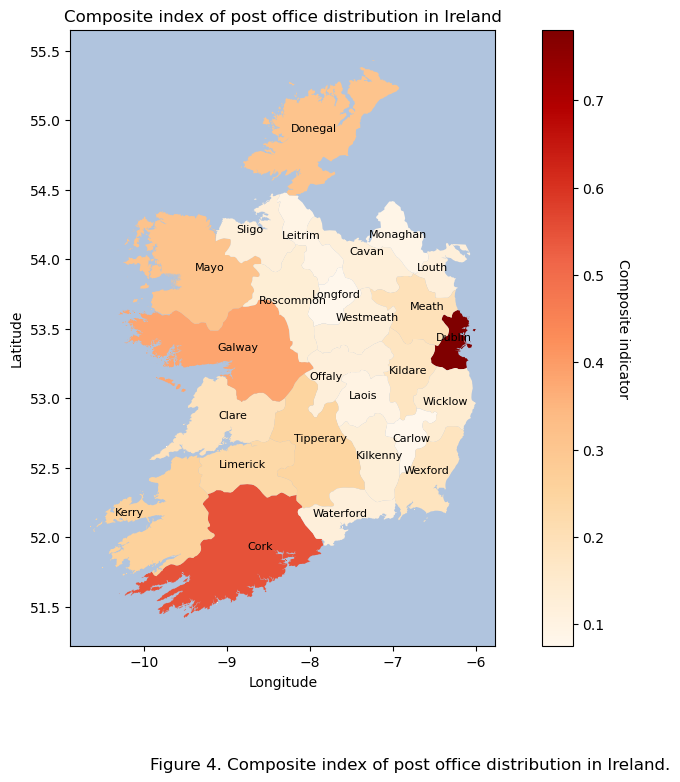

In [8]:
# Figure 4: Plotting composite index of post offices in each county.

# Create a choropleth map
ax = df2.plot(column='composite_indicator', cmap='OrRd', legend=True, figsize=(12, 8))

# Set background color to seacolour blue
ax.set_facecolor('lightsteelblue')

# Add names of counties
for idx, row in df2.iterrows():
    plt.annotate(text=row['NAME_1'], xy=row['coords'],
                 horizontalalignment='center', color='black', fontsize=8, fontweight='light')

# Add title and labels
plt.title('Composite index of post office distribution in Ireland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add annotation under the plots
plt.annotate('Figure 4. Composite index of post office distribution in Ireland.',
             xy=(0.8, -0.2),  # Coordinates for the text
             xycoords='axes fraction',  # Use axes fraction coordinates
             fontsize=12, color='black',
             horizontalalignment='center')

ax.text(-4.3, 53.5, 'Composite indicator', va="center",rotation=270) # the legend for the colour bar

# Show the map
plt.show()